In [1]:
import pandas as pd
import numpy as np
import os
#importing visualization libraries
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:

# Set the working directory
os.chdir(r"C:\Users\Khushi Pandey\Downloads")

# Read the CSV file into a DataFrame
df = pd.read_csv("online_shoppers_intent.csv")

#Print the first five records of the given dataset
print("First five records of the given dataset:")
print(df.head())




First five records of the given dataset:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00   

correlation : 

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0

<AxesSubplot:>

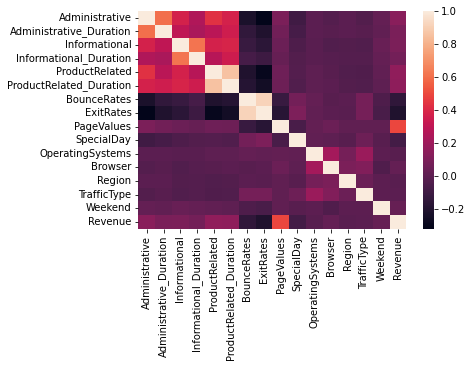

In [3]:

print("correlation : \n")
#correlation between the columns
print(df.corr())
sns.heatmap(df.corr())

In [4]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
# splitting our data into an X array that contains features to train on and
#y array with the target variable
x = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']]
y = df["ProductRelated"]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.45 , random_state = 35 )

from sklearn.linear_model import LinearRegression
#fit my model or my training data 
lm = LinearRegression()
print(lm.fit(x_train, y_train))
#evaluate our model by checking out its coefficients
print(lm.intercept_)
# Assuming `x` is your DataFrame containing the feature columns
coefficients = pd.DataFrame(lm.coef_, x.columns, columns=["coefficient"])
print(coefficients)



LinearRegression()
9.592326932761353e-14
                          coefficient
Administrative           2.104130e-14
Administrative_Duration -1.734723e-16
Informational            2.661365e-14
Informational_Duration   4.898425e-16
ProductRelated           1.000000e+00
ProductRelated_Duration  0.000000e+00
BounceRates              1.124629e-13
ExitRates               -1.367584e-13
PageValues              -1.108597e-16
SpecialDay              -3.461877e-15
OperatingSystems        -6.966773e-16
Browser                 -1.898590e-16
Region                  -9.661604e-16
TrafficType              5.476593e-16


In [6]:
pd.DataFrame(lm.coef_ , x.columns , columns = ["coefficient"])

,coefficient
Administrative,2.104130e-14
Administrative_Duration,-1.734723e-16
Informational,2.661365e-14
Informational_Duration,4.898425e-16
ProductRelated,1.000000e+00
ProductRelated_Duration,0.000000e+00
BounceRates,1.124629e-13
ExitRates,-1.367584e-13
PageValues,-1.108597e-16
SpecialDay,-3.461877e-15


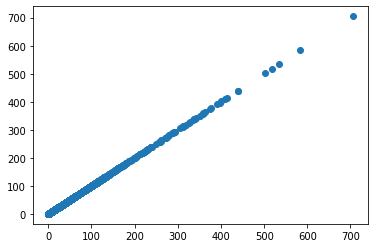

In [7]:

#predictions
#prediciting the customers 
predictions = lm.predict(x_test)
predictions
plt.scatter(y_test , predictions)
#if in our scatter plot we are getting a straight line then our values are correctly predicted

C:\Users\Khushi Pandey\AppData\Local\Temp\ipykernel_16996\2848463456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predictions)


<AxesSubplot:xlabel='ProductRelated', ylabel='Density'>

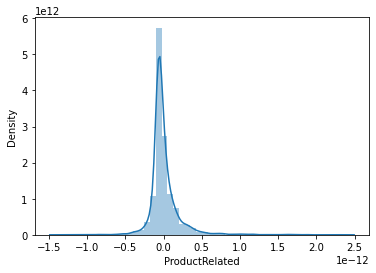

In [8]:
#distplot between the predicted value and actual value 
sns.distplot(y_test - predictions)

In [9]:
#TO MINIMIZE THE LOSS FUNCTIONS
from sklearn import metrics
#there are three types of metrices :
#MAE(MEAN ABSOLUTE ERROR)
#MSE(MEAN SQUARED ERROR)
#RMSE(ROOT MEAN SQUARED ERROR)
print("mean absolute error : ", metrics.mean_absolute_error(y_test , predictions))
print("mean squared error : ", metrics.mean_squared_error(y_test , predictions))
print("root mean squared error : ", np.sqrt(metrics.mean_squared_error(y_test , predictions)))


mean absolute error :  1.1426528317724518e-13
mean squared error :  4.068919691387278e-26
root mean squared error :  2.0171563378645885e-13


<AxesSubplot:>

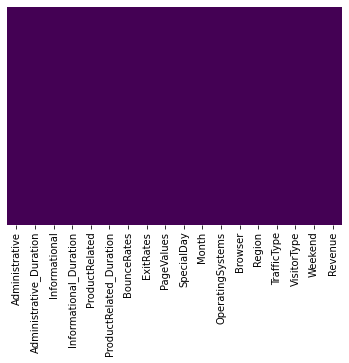

In [10]:
#to know whether there is any null value or not as we can see there is no null value in our given dataset
sns.heatmap(df.isnull() , yticklabels= False , cbar = False , cmap = "viridis")

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

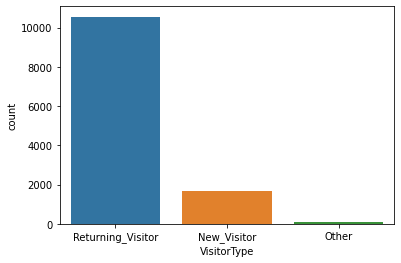

In [11]:

sns.countplot(x = "VisitorType" , data = df)

<AxesSubplot:xlabel='Revenue', ylabel='count'>

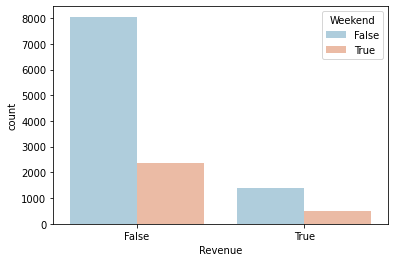

In [12]:
sns.countplot(x = "Revenue" , hue = "Weekend",data = df ,palette= "RdBu_r" )

C:\Users\Khushi Pandey\AppData\Local\Temp\ipykernel_16996\1772475600.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Region"].dropna() ,kde = False , bins = 30 )


<AxesSubplot:xlabel='Region'>

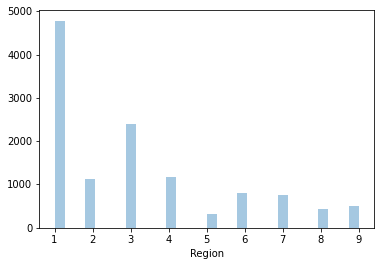

In [13]:
#to get distribution of customers among the various regions
sns.distplot(df["Region"].dropna() ,kde = False , bins = 30 )

In [14]:
#in order to make our data more interactive through graphs
import cufflinks as cf
cf.go_offline()
df["ProductRelated_Duration"].iplot(kind = "hist" , bins = 50 , )

<AxesSubplot:xlabel='Region', ylabel='VisitorType'>

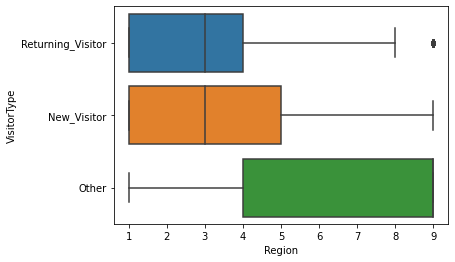

In [15]:
sns.boxplot(x = "Region" , y = "VisitorType" , data = df)

In [16]:
pd.get_dummies(df["Revenue"],drop_first= True)

,True
0,0
1,0
2,0
3,0
4,0
...,...
12325,0
12326,0
12327,0
12328,0


In [17]:
from sklearn.linear_model import LogisticRegression
# Perform one-hot encoding on categorical variables
encoded_data = pd.get_dummies(data = df, columns=['Month', 'VisitorType'])

# Split the encoded data into features and target variables
X1 = encoded_data.drop('Revenue', axis=1)
y1 = encoded_data['Revenue']

# Split the data into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.45, random_state=45)

# Initialize and train the logistic regression model
logmodel = LogisticRegression()
logmodel.fit(X1_train, y1_train)

# Make predictions on the test set
predictions1 = logmodel.predict(X1_test)


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



CLASSIFICATION REPORT:
It is basically tell us our recall value accuracy 
Support in classification report is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for  rebalancing. 

In [18]:
from sklearn.metrics import classification_report
print(classification_report(predictions , y1_test))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test , predictions)

array([[4551,  135],
       [ 520,  343]], dtype=int64)

KNN CLUSTERING :
K Nearest Neighbors


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
encoded_data = pd.get_dummies(data = df, columns=['Month', 'VisitorType'])
scaler.fit(encoded_data.drop("Revenue", axis = 1))
scaled_features = scaler.transform(encoded_data.drop("Revenue" , axis = 1))
#scaled_features will provide us the scaled version of the actual values
scaled_features

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       [ 0.50722805, -0.03291592, -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  2.50571955,
        -0.08331632, -2.43533571]])

In [ ]:
df_scaled = pd.DataFrame(scaled_features)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621


In [ ]:
X2 = df_scaled
y2 = encoded_data["Region"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.45, random_state=45)


In [ ]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X2_train , y2_train)
predict = knn.predict(X2_test)
predict

array([False, False, False, ...,  True, False, False])

CLASSIFICATION REPORT AND CONFUSION MATRIX OF KNN 

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
print(confusion_matrix(y2_test , predict))
print(classification_report(y2_test , predict))

[[4262  424]
 [ 479  384]]
              precision    recall  f1-score   support

       False       0.90      0.91      0.90      4686
        True       0.48      0.44      0.46       863

    accuracy                           0.84      5549
   macro avg       0.69      0.68      0.68      5549
weighted avg       0.83      0.84      0.84      5549



ERROR RATE

Text(0, 0.5, 'ERROR RATE')

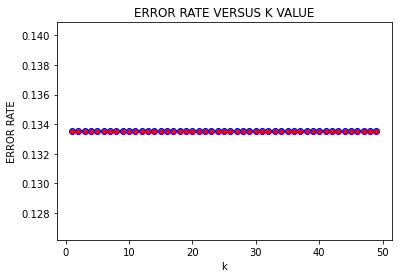

In [ ]:
error_rate = []
for i in range (1 ,50) :
    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(X2_train , y2_train)
    pred_i = knn.predict(X2_test)
    error_rate.append(np.mean(pred_i != y2_test))
error_rate
plt.plot(range(1, 50) , error_rate , color = "blue" , linestyle = "dashed" , marker = "o" , markerfacecolor = "red" , markersize = 6)
plt.title("ERROR RATE VERSUS K VALUE")
plt.xlabel("k")
plt.ylabel("ERROR RATE")

DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#get dummies function is used to encode "Month" column creating separate binary column for each month
#which help us to
data = pd.get_dummies(df, columns=['Month' , 'VisitorType'])
x3 = data.drop(['Revenue', 'Weekend'], axis=1)
y3 = data['Revenue']
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.35, random_state=42)
dtree = DecisionTreeClassifier()
dtree.fit(x3_train , y3_train)
result = dtree.predict(x3_test)
print(metrics.confusion_matrix(y3_test , result))
print("\n")
print(metrics.classification_report(y3_test , result))


[[3341  304]
 [ 298  373]]


              precision    recall  f1-score   support

       False       0.92      0.92      0.92      3645
        True       0.55      0.56      0.55       671

    accuracy                           0.86      4316
   macro avg       0.73      0.74      0.74      4316
weighted avg       0.86      0.86      0.86      4316



RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 200)
rfc.fit(x3_train , y3_train)
rfc_predict = rfc.predict(x3_test)
print(metrics.confusion_matrix(y3_test , rfc_predict))
print("\n")
print(metrics.classification_report(y3_test , rfc_predict))

[[3515  130]
 [ 301  370]]


              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3645
        True       0.74      0.55      0.63       671

    accuracy                           0.90      4316
   macro avg       0.83      0.76      0.79      4316
weighted avg       0.89      0.90      0.89      4316



If we look at the classification report of the Random forest and the Decision tree we came to know that the precision of the Random Forest Tree is more as in comparision to the Decision Tree

SUPPORT VECTOR MACHINES

In [ ]:
from sklearn.svm import SVC
data = pd.get_dummies(df, columns=['Month' , 'VisitorType'])
x3 = data.drop(['Revenue', 'Weekend'], axis=1)
y3 = data['Revenue']
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.35, random_state=42)
model =  SVC()
model.fit(x3_train , y3_train)
svc_predictions = model.predict(x3_test)
print("confusion matrix : \n" , metrics.confusion_matrix(y3_test , svc_predictions))
print("\n")
print("\n")
print("classification_report : \n",metrics.classification_report(y3_test , svc_predictions))

confusion matrix : 
 [[3644    1]
 [ 664    7]]




classification_report : 
               precision    recall  f1-score   support

       False       0.85      1.00      0.92      3645
        True       0.88      0.01      0.02       671

    accuracy                           0.85      4316
   macro avg       0.86      0.51      0.47      4316
weighted avg       0.85      0.85      0.78      4316



In [ ]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#c is the regularization parameter
param_grid = {
    "C": [0.1, 0.2, 0.5, 10, 100, 0.7, 0.12, 120, 0.1, 0.2, 0.5, 10, 100, 0.1, 0.2, 0.5, 10, 100],
    "gamma": [1, 0.1, 0.001, 1, 0.1, 0.001, 1, 0.001, 0.0001, 0.0001, 0.00001, 1, 0.1, 0.001, 0.0001, 0.00001, 0.0001, 0.00001]
}
grid = GridSearchCV(SVC(), param_grid, verbose=3)
#printing 
grid.fit(x3_train, y3_train)"""
#YOU CAN USE THIS FOR GREATER PRECISION BUT AS OUR DATASET IS BIG SO FITTING OF DATA WILL TAKE A LOT OF TIME


'from sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVC\n#c is the regularization parameter\nparam_grid = {\n    "C": [0.1, 0.2, 0.5, 10, 100, 0.7, 0.12, 120, 0.1, 0.2, 0.5, 10, 100, 0.1, 0.2, 0.5, 10, 100],\n    "gamma": [1, 0.1, 0.001, 1, 0.1, 0.001, 1, 0.001, 0.0001, 0.0001, 0.00001, 1, 0.1, 0.001, 0.0001, 0.00001, 0.0001, 0.00001]\n}\ngrid = GridSearchCV(SVC(), param_grid, verbose=3)\n#printing \ngrid.fit(x3_train, y3_train)'